In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

# Cross-Validation

In this example, we will expand on the concept of support vector machines (SVMs) to show how useful cross-validation can be. SVMs often rely on cross-validation because the hyper-parameters are extremely sensitive to the data. Performing cross-validation allows us to test performance across different hyper-parameters and different train-test splits. `scikit-learn` provides users with a variety of different tools for performing this scan and these tasks will give users a chance to experiment with them.

The documentation for cross-validation can be found [here](https://scikit-learn.org/stable/modules/cross_validation.html)

The categories are stored in the column `'success'` which has 3 options:

- `0` - no effect
- `1` - success
- `2` - overdose

and as such, we are aiming to successfully create a model for successful effect of the drug.

In [253]:
# import and shuffle data
data = pd.read_csv('data/504-drug-success.csv').sample(frac=1).reset_index(drop=True)

# standard scale data
data['dose'] = (data['dose'] - data['dose'].<...>) / data['dose'].std()
data['age'] = (data['age'] - data['age'].<...>) / <...>.std()
data

,dose,age,performance,success
0,-0.590441,1.109409,5.76,2
1,0.113834,0.238899,4.97,1
2,-1.760779,1.086179,5.68,2
3,-1.204955,1.616257,6.07,2
4,-1.046148,-1.595044,4.49,1
...,...,...,...,...
815,-1.733161,-0.842376,0.56,0
816,-0.731986,-0.611760,2.98,0
817,-0.455800,-1.698526,4.66,1
818,-0.694010,-1.185765,3.75,1


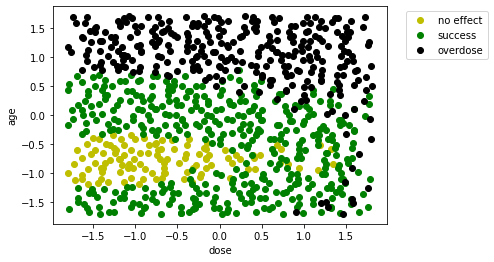

In [254]:
# visualise
import matplotlib.pyplot as plt

status = [
    'no effect',
    'success',
    'overdose'
]

colours = [
    'y',
    'g',
    'k'
]

fig, ax = plt.subplots()
for i in range(3):
    temp = data[<...>['success'] == <...>]
    ax.plot(
        temp['dose'], 
        temp['age'], 
        'o', 
        color=<...>[i], 
        label=status[<...>]
    )
    
# set labels
ax.<...>('dose')
ax.set_ylabel('age')

# add legend
ax.<...>(bbox_to_anchor=(1.04,1), loc="upper left")

## Running a single classifier with different train-test splits

For more details look [here](https://scikit-learn.org/stable/modules/cross_validation.html)

In [347]:
X = data[<...>].to_numpy()
y = data['success'].<...>

# Hide some data from the model - we will imagine that this data has
# not been collected - this is different to an artificial train-test split

n_collected = 200
X_collected = X[:n_collected]
y_collected = y[:n_collected]


# This is our hidden data - in a real experiment we would 
# not have access to this
X_new = X[n_collected:]
y_new = y[n_collected:]


In [348]:
clf = svm.SVC(kernel='linear', C=1, random_state=0)

# use cross_val_score - look up the arguments using the documentation
from sklearn.model_selection import cross_val_score
cross_val_score(<...>, <...>, <...>, cv=5)

array([0.8  , 0.825, 0.725, 0.85 , 0.875])

## Running many classifiers with different train-test splits

For more details look [here](https://scikit-learn.org/stable/modules/grid_search.html) - our example is simpler than this

In [349]:
gamma_values = np.logspace(0, 1, num=20, dtype=float)

clfs = {
    f'RBF_{g:.2f}': svm.SVC(kernel='rbf', gamma=g, C=5) for <...> in <...>
}

scores = []

for name, clf in clfs.items():
    score = <...>(clf, X_collected, <...>, cv=5)
    scores.<...>((np.mean(score), np.std(score)))
    #print(f"{name}: {np.mean(score):.3f} \u00B1 {np.std(score):.2f}")
    
scores = np.array(scores)
results = pd.DataFrame({
    'name': <...>,
    'gamma': gamma_values, 
    'mean': <...>, 
    'std': scores[:, 1]
})
    
results

,name,gamma,mean,std
0,RBF_1.00,1.000000,0.890,0.056125
1,RBF_1.13,1.128838,0.885,0.060415
2,RBF_1.27,1.274275,0.885,0.060415
3,RBF_1.44,1.438450,0.885,0.060415
4,RBF_1.62,1.623777,0.890,0.064420
5,RBF_1.83,1.832981,0.895,0.057879
6,RBF_2.07,2.069138,0.890,0.064420
7,RBF_2.34,2.335721,0.880,0.065955
8,RBF_2.64,2.636651,0.865,0.073485
9,RBF_2.98,2.976351,0.870,0.067823


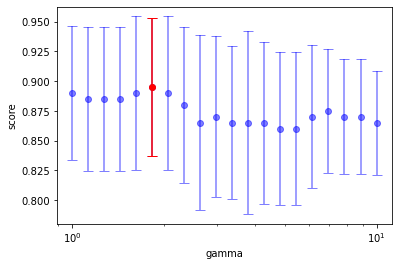

In [350]:
fig, ax = plt.subplots()

# plot the errorbars of each of the classifiers - look up the documentation if you don't know the arguments
ax.errorbar(
    <...>, 
    results[<...>], 
    <...>=results['std'],
    fmt='bo',
    capsize=5,
    alpha=0.5
)

# get index of best performing classifier
index = results[<...>].argmax()

# get name from results dataframe
name = results['name'][<...>]

# get classifier model from clfs dictionary
model = <...>[name]

ax.errorbar(
    [results.<...>[index, <...>]], 
    [results.loc[<...>, 'mean']], 
    <...>=[results.loc[index, 'std']],
    fmt='ro',
    capsize=5
)

# set log scale
ax.set_<...>('log')

# set labels
ax.set_xlabel('gamma')
ax.set_ylabel('score')

None

In [351]:
# prepare contour plot data
h = 0.02
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

# create a meshgrid for the contour plot
xx, yy = np.meshgrid(
    np.arange(<...>, x_max, h),
    np.<...>(y_min, <...>, h)
)

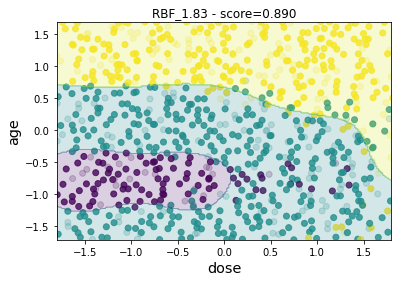

In [352]:
# Visualise the best performing model

# first plot the 'success' data
fig, ax = plt.subplots()
ax.scatter(X_collected[:, 0], X_collected[:, 1], c=y_collected, alpha=0.2)
ax.scatter(X_new[:, 0], X_new[:, 1], c=y_new, alpha=0.8)

# plot the model boundaries
model.fit(<...>)
zz = model.predict(np.c_[xx.ravel(), yy.ravel()])

# get zz for contour plot
zz = zz.reshape(xx.shape)

# do contour plot
ax.contourf(<...>, <...>, zz, alpha=0.2)

# set labels
ax.set_xlabel('dose', fontsize='x-large')
ax.set_ylabel('age', fontsize='x-large')

# set limits
ax.set_xlim((xx.min(), xx.max()))
ax.set_ylim((yy.min(), yy.max()))

# set title
ax.set_title(f"{name} - score={model.score(X_new, y_new):.3f}")
None

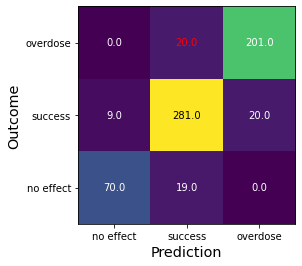

In [353]:
# plot confusion matrix using new data
y_pred = model.predict(<...>)
array = np.zeros((3, 3))
for i, correct_result in enumerate(y_new):
    array[correct_result, y_pred[i]] += <...>

# plot confusion matrix
fig, ax = plt.subplots()
<...>.imshow(<...>, origin='lower')

# set labels
ax.set_xlabel('Prediction', fontsize='x-large')
ax.set_ylabel('Outcome', fontsize='x-large')

# set tick labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(status)
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(status)

# add text
for i in range(3):
    for j in range(3):
        
        # leave colour as white as the default
        color = 'white'
        if (i == 2 and j != 2):
            
            # when overdose happened but wasn't predicted, changed colour
            # to red if it is not 0
            if array[i, j] == 0:
                <...> = 'white'
                
            else:
                <...> = 'red'
                
        # set colour to black for the light coloured square
        # this is done after plotting once
        elif i == 1 and <...> == 1:
            color = 'black'
        
        # add text with correct colour
        ax.<...>(j, i, array[i, j], ha='center', va='center', color=<...>)
        
None

## Summary

This task has contained a large amount of information on doing cross validation and also including a detailed recap on using SVM classifiers. Users are advised to use this file as a template for some of the functionalities of SVM classifiers and the importance of using cross validation to ensure that the location of a train-test split does not affect the final result of a model.

As a final note - how would you use this data in a drug trial? Note that we need to minimise the yellow dots in the green section, since this would mean people experiencing unwanted side effects. This is represented in the confusion matrix in the top-centre square which has a value of 20, since we predicted success but instead there was an overdose.

Is this result successful, is it acceptable? What about where we predict success but there is no effect? How serious is this for the outcome of the drug and its use after the trial? These are the decisions that users will be expected to advise upon, or perhaps even make if working for companies or start-ups involved in trials.

How about if we wanted to maximise the success rate, than we would want the centre square to have the highest value, this would allow a better understanding of the parameter space you are working with, despite not having the full data from all ages and doses.

> Advanced users can bias the model to minimise these values instead of the overall error, since some errors are more important than others. In this case, a custom `metric` would have to be used, but this is beyond the scope of this lecture course